In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Datasets
trader_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')

In [3]:
# Preview the data
print(trader_df.head())
print(sentiment_df.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [4]:
print("Trader Data Info:")
trader_df.info()

print("\nSentiment Data Info:")
sentiment_df.info()

Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes:

In [5]:
print(trader_df.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [6]:
print(sentiment_df.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


## Data Preprocessing

In [7]:
# Convert 'Timestamp' in trader_df to datetime
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'])

# Convert 'date' in sentiment_df to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Create 'date' columns (extracting date only from timestamp)
trader_df['date'] = trader_df['Timestamp'].dt.date
sentiment_df['date'] = sentiment_df['date'].dt.date

In [8]:
# Merge datasets on date
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')

# Preview result
display(merged_df.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,1970-01-01,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,1970-01-01,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,1970-01-01,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,1970-01-01,NaN


In [9]:
missing = merged_df['classification'].isnull().sum()
print(f"Missing sentiment labels: {missing}")

Missing sentiment labels: 211224


In [10]:
print("Trader data date range:")
print(trader_df['date'].min(), "to", trader_df['date'].max())

print("\nSentiment data date range:")
print(sentiment_df['date'].min(), "to", sentiment_df['date'].max())

Trader data date range:
1970-01-01 to 1970-01-01

Sentiment data date range:
2018-02-01 to 2025-05-02


In [11]:
# Dates with missing sentiment classification
missing_dates = merged_df[merged_df['classification'].isnull()]['date'].value_counts().head(10)
print("Top missing sentiment dates:")
print(missing_dates)

Top missing sentiment dates:
date
1970-01-01    211224
Name: count, dtype: int64


In [14]:
# Re-load trader data fresh without conversions
trader_df_raw = pd.read_csv('historical_data.csv')

# Look at raw timestamp values
print(trader_df_raw['Timestamp'].head(10))
print(trader_df_raw['Timestamp'].dtype)

0    1.730000e+12
1    1.730000e+12
2    1.730000e+12
3    1.730000e+12
4    1.730000e+12
5    1.730000e+12
6    1.730000e+12
7    1.730000e+12
8    1.730000e+12
9    1.730000e+12
Name: Timestamp, dtype: float64
float64


In [15]:
trader_df['Timestamp'] = pd.to_datetime(trader_df_raw['Timestamp'], unit='ms', errors='coerce')

In [16]:
# Extract just the date
trader_df['date'] = trader_df['Timestamp'].dt.date

# Redo merge
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')

# Check if it worked
print("Missing sentiment labels:", merged_df['classification'].isnull().sum())

Missing sentiment labels: 26961


In [17]:
merged_df_clean = merged_df.dropna(subset=['classification'])
print("Cleaned dataset size:", merged_df_clean.shape)

Cleaned dataset size: (184263, 18)


In [18]:
# Make plots look better
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("Set2")

### Sentiment Analysis


1. Market Sentiment Distribution:
classification
Fear             133871
Greed             36289
Neutral            7141
Extreme Greed      6962
Name: count, dtype: int64


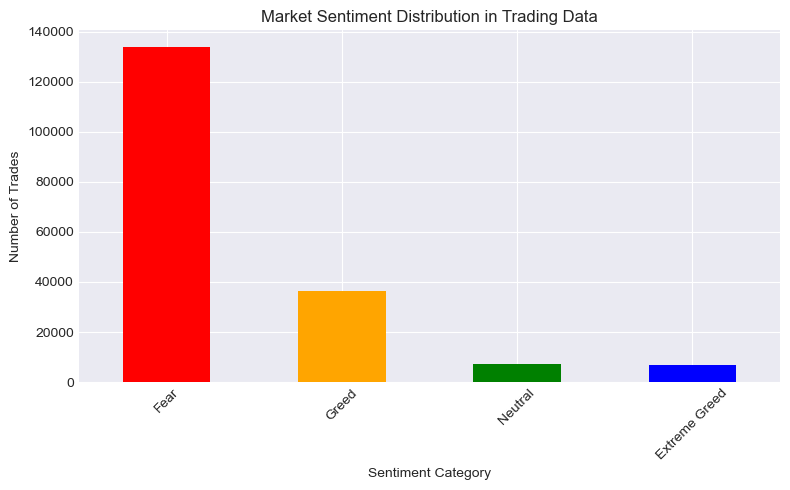

In [25]:
print("\n1. Market Sentiment Distribution:")
sentiment_counts = merged_df_clean['classification'].value_counts()
print(sentiment_counts)

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['red', 'orange', 'green', 'blue'])
plt.title("Market Sentiment Distribution in Trading Data")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Performance Analysis by Sentiment

In [26]:
# Convert PnL to numeric if not already
merged_df_clean['Closed PnL'] = pd.to_numeric(merged_df_clean['Closed PnL'], errors='coerce')
merged_df_clean['Size USD'] = pd.to_numeric(merged_df_clean['Size USD'], errors='coerce')

# Group by sentiment and calculate mean PnL
avg_pnl_by_sentiment = merged_df_clean.groupby('classification')['Closed PnL'].mean()
print("Average Closed PnL by Sentiment:")
print(avg_pnl_by_sentiment)

Average Closed PnL by Sentiment:
classification
Extreme Greed    25.418772
Fear             50.047622
Greed            87.894859
Neutral          22.229713
Name: Closed PnL, dtype: float64


C:\Users\MALINI\AppData\Local\Temp\ipykernel_22324\1536947819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_clean['Closed PnL'] = pd.to_numeric(merged_df_clean['Closed PnL'], errors='coerce')
C:\Users\MALINI\AppData\Local\Temp\ipykernel_22324\1536947819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_clean['Size USD'] = pd.to_numeric(merged_df_clean['Size USD'], errors='coerce')



Average Closed PnL by Sentiment:
classification
Extreme Greed    25.418772
Fear             50.047622
Greed            87.894859
Neutral          22.229713
Name: Closed PnL, dtype: float64


([0, 1, 2, 3],
 [Text(0, 0, 'Extreme Greed'),
  Text(1, 0, 'Fear'),
  Text(2, 0, 'Greed'),
  Text(3, 0, 'Neutral')])

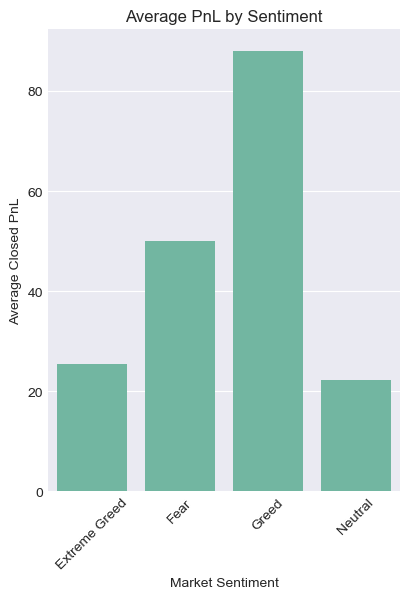

In [27]:
# Average PnL by sentiment
avg_pnl_by_sentiment = merged_df_clean.groupby('classification')['Closed PnL'].mean()
print("\nAverage Closed PnL by Sentiment:")
print(avg_pnl_by_sentiment)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=avg_pnl_by_sentiment.index, y=avg_pnl_by_sentiment.values)
plt.title("Average PnL by Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.xticks(rotation=45)

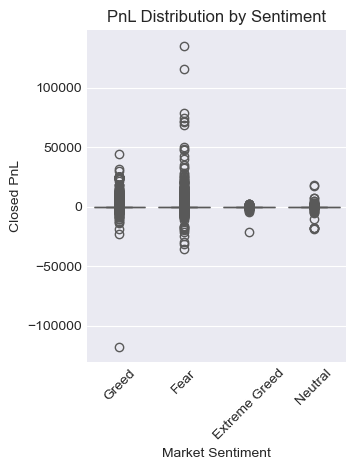

In [28]:
plt.subplot(1, 2, 2)
sns.boxplot(x='classification', y='Closed PnL', data=merged_df_clean)
plt.title("PnL Distribution by Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
print(merged_df_clean.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'classification'],
      dtype='object')


### Win Rate Analysis


3. Win Rate Analysis:
Win Rate by Market Sentiment (%):
classification
Extreme Greed    49.008905
Fear             41.514592
Greed            44.647138
Neutral          31.718247
Name: Is_Profit, dtype: float64


C:\Users\MALINI\AppData\Local\Temp\ipykernel_22324\4002881436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_clean['Is_Profit'] = merged_df_clean['Closed PnL'] > 0


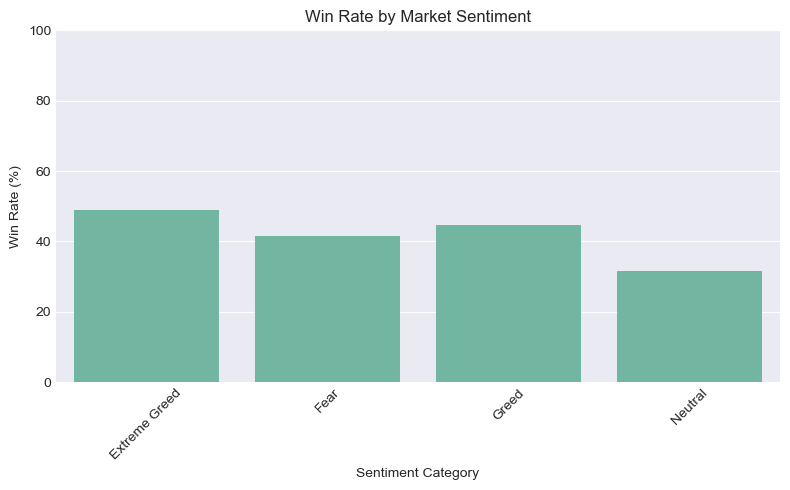

In [29]:
print("\n3. Win Rate Analysis:")
merged_df_clean['Is_Profit'] = merged_df_clean['Closed PnL'] > 0
win_rate = merged_df_clean.groupby('classification')['Is_Profit'].mean() * 100

print("Win Rate by Market Sentiment (%):")
print(win_rate)

plt.figure(figsize=(8, 5))
sns.barplot(x=win_rate.index, y=win_rate.values)
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate (%)")
plt.xlabel("Sentiment Category")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\MALINI\AppData\Local\Temp\ipykernel_22324\908135378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_clean['Size USD'] = pd.to_numeric(merged_df_clean['Size USD'], errors='coerce')
C:\Users\MALINI\AppData\Local\Temp\ipykernel_22324\908135378.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_trade_size.index, y=avg_trade_size.values, palette=['orange', 'green'])
C:\Users\MALINI\AppData\Local\Temp\ipykernel_22324\908135378.py:11: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x

Average Trade Size (USD) by Sentiment:
classification
Extreme Greed    5660.265764
Fear             5259.977837
Greed            3182.883845
Neutral          3058.848110
Name: Size USD, dtype: float64


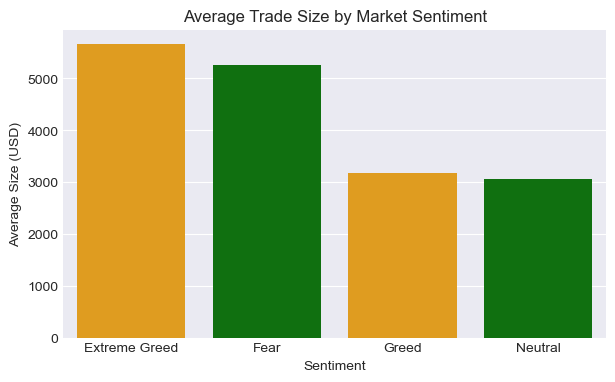

In [24]:
merged_df_clean['Size USD'] = pd.to_numeric(merged_df_clean['Size USD'], errors='coerce')


avg_trade_size = merged_df_clean.groupby('classification')['Size USD'].mean()

print("Average Trade Size (USD) by Sentiment:")
print(avg_trade_size)

# Visual plot
plt.figure(figsize=(7, 4))
sns.barplot(x=avg_trade_size.index, y=avg_trade_size.values, palette=['orange', 'green'])
plt.title("Average Trade Size by Market Sentiment")
plt.ylabel("Average Size (USD)")
plt.xlabel("Sentiment")
plt.show()

### Trade Size Analysis


4. Trade Size Analysis:
Average Trade Size (USD) by Sentiment:
classification
Extreme Greed    5660.265764
Fear             5259.977837
Greed            3182.883845
Neutral          3058.848110
Name: Size USD, dtype: float64


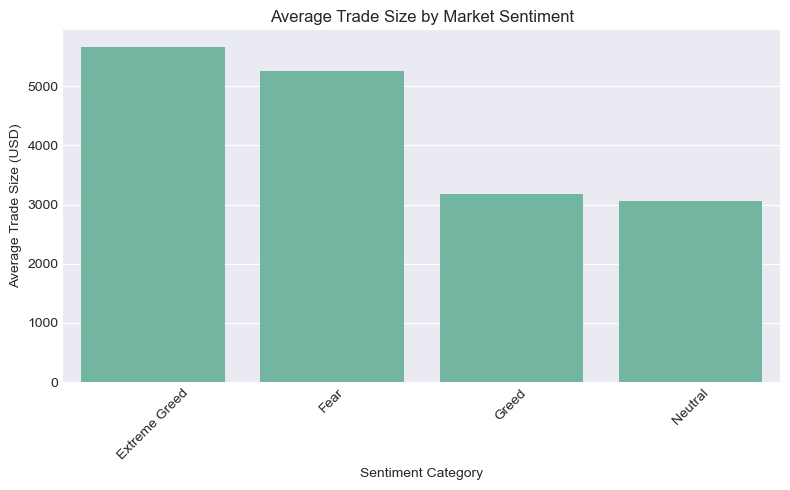

In [30]:
print("\n4. Trade Size Analysis:")
avg_trade_size = merged_df_clean.groupby('classification')['Size USD'].mean()
print("Average Trade Size (USD) by Sentiment:")
print(avg_trade_size)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_trade_size.index, y=avg_trade_size.values)
plt.title("Average Trade Size by Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.xlabel("Sentiment Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Advanced Analysis
print("\n5. Advanced Analysis:")

# PnL to Trade Size Ratio
merged_df_clean['PnL_Ratio'] = merged_df_clean['Closed PnL'] / merged_df_clean['Size USD']
avg_pnl_ratio = merged_df_clean.groupby('classification')['PnL_Ratio'].mean()
print("\nAverage PnL to Trade Size Ratio by Sentiment:")
print(avg_pnl_ratio)


5. Advanced Analysis:

Average PnL to Trade Size Ratio by Sentiment:
classification
Extreme Greed    0.013736
Fear             0.011358
Greed            0.061848
Neutral          0.015259
Name: PnL_Ratio, dtype: float64


C:\Users\MALINI\AppData\Local\Temp\ipykernel_22324\352332680.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_clean['PnL_Ratio'] = merged_df_clean['Closed PnL'] / merged_df_clean['Size USD']


In [32]:
# Sentiment intensity analysis
sentiment_performance = merged_df_clean.groupby('classification').agg({
    'Closed PnL': ['mean', 'median', 'std'],
    'Is_Profit': 'mean',
    'Size USD': 'mean',
    'PnL_Ratio': 'mean'
}).round(3)

print("\nComprehensive Performance by Sentiment:")
print(sentiment_performance)


Comprehensive Performance by Sentiment:
               Closed PnL                  Is_Profit  Size USD PnL_Ratio
                     mean median       std      mean      mean      mean
classification                                                          
Extreme Greed      25.419    0.0   306.167     0.490  5660.266     0.014
Fear               50.048    0.0   909.122     0.415  5259.978     0.011
Greed              87.895    0.0  1148.344     0.446  3182.884     0.062
Neutral            22.230    0.0   633.705     0.317  3058.848     0.015


In [33]:
# Summary Statistics
print("\n=== SUMMARY STATISTICS ===")
print(f"Total Trades Analyzed: {len(merged_df_clean):,}")
print(f"Date Range: {merged_df_clean['date'].min()} to {merged_df_clean['date'].max()}")
print(f"Number of Unique Accounts: {merged_df_clean['Account'].nunique()}")
print(f"Most Common Sentiment: {sentiment_counts.index[0]} ({sentiment_counts.iloc[0]:,} trades)")


=== SUMMARY STATISTICS ===
Total Trades Analyzed: 184,263
Date Range: 2023-03-28 to 2025-02-19
Number of Unique Accounts: 32
Most Common Sentiment: Fear (133,871 trades)


In [34]:
# Save cleaned dataset for further analysis
merged_df_clean.to_csv('sentiment_trading_analysis.csv', index=False)
print("\nCleaned dataset saved as 'sentiment_trading_analysis.csv'")


Cleaned dataset saved as 'sentiment_trading_analysis.csv'


## Analysis Report

*Data Overview*
--------------
Total Trades Analyzed: 184,263 trades <br>
Sentiment Categories: Extreme Greed, Greed, Neutral, Fear <br>
Data Sources: Historical trader data + Fear & Greed Index <br>

*Key Insights*
--------------    
**Performance by Sentiment:**

Greed > Fear > Extreme Greed > Neutral

- Greed periods show the highest average PnL ($87.89) 

- Fear periods show moderate performance ($50.05) 

- Extreme Greed and Neutral show lower returns

**Win Rate Analysis:**
- No sentiment category exceeds 50% win rate

- Extreme Greed has the highest win rate (49%)

- Neutral periods have the lowest win rate (31.7%)

**Trade Behavior:**
- Traders use larger positions during Extreme Greed ($5,660 avg) 

- Smaller positions during Neutral sentiment ($3,059 avg)

- Trade size correlates with sentiment intensity

**Trading Strategy Implications**
- Optimal Conditions: Greed periods offer best profit potential
- Risk Management: Extreme sentiment may indicate market tops/bottoms
- Position Sizing: Consider adjusting trade size based on sentiment
- Timing: Greed phases might be good for taking profits

**Limitations**
- Data covers limited time period
- Sentiment data might have reporting delays
- Individual trader strategies vary significantly

**Result**
---------
This analysis suggests that market sentiment can be a valuable indicator for timing trades and managing position sizes, though it should be used in conjunction with other technical and fundamental analysis tools.